Megan McKenzie

QBS 101.5 Data Visualization Assignment

Professors Simon Stone, Carly Bobak, and Jeremy Mikecz

Target: Pick a dataset of interest, clean/prepare it, visualize different interesting aspects, and briefly analyze the information. Practice this process for the final project in this course.

The follow code chunk is for importing libraries we will need in this assignment

In [2]:
# working with dataframes
import pandas as pd

# working with paths for files
import pathlib, glob
from pathlib import Path

# visualization libraries
import seaborn as sns

The datset I have chosen comes from Kaggle. It is called the Diabetes Health Indicators Dataset, created by Alex Teboul. 

I chose this dataset because I want to become more familiar in working with health data. Additionally, I want to start with a very common and well known disease. Diabetes has high prevelance in the United States, and has many potential related factors- many of which are available in this dataset. This information comes from an annual health-related telephone survey conducted by the CDC, for the Behavioral Risk Factor Surveillance System (BRFSS).

This data comes in the form of csv files, which I pull from a path and create a dataframe for. Just the health indicators file is used for this assignment.

In [16]:
# data is from here: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?resource=download

path = Path("../data_vis_assignment/diabetes_012_health_indicators_BRFSS2015.csv")
df = pd.read_csv(path)

Looking at what we are working with:

In [17]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [18]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [19]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Here are the visualizations I have created with the Python data visualization library, Seaborn.

First, I wanted to look at the BMI values of people who have never had diabetes/only during pregnancy (denoted as 0.0), those who are prediabetic (1.0), and those with diabetes (2.0)

<Axes: xlabel='Diabetes_012', ylabel='BMI'>

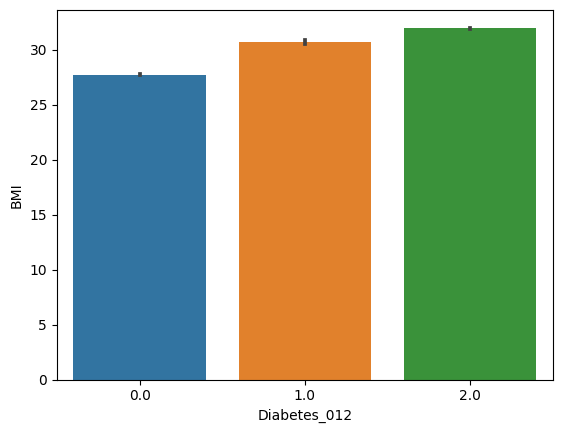

In [31]:
sns.barplot(df, x = "Diabetes_012", y = "BMI")

It seems that there is a slight increase in BMI as relation to diabetes intensifies. Those who are not diabetic at all have a lower BMI, around 27, where as those who re prediabetic average to a BMI of around 30, and finally those with diabetes have a BMI slightly higher than 30. It is important to keep in mind that there may be confounding variables going on here. Further knowledge of medicince would be a great aid in  interpreting this data.

Next, I wanted to explore other variables. Physical and mental health may have a unique relationship, so below is a simple bar graph with increasing values of mental and phsyical health. A higher numerical value means better mental/physical health

<Axes: xlabel='PhysHlth', ylabel='MentHlth'>

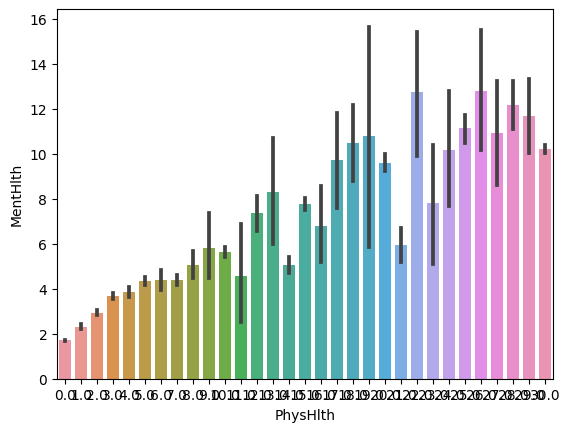

In [50]:
sns.barplot(df, x = "PhysHlth", y = "MentHlth")

This plot investigates the relationship between physical activity and the extent to which the people have had a heart disease or heart attack.

<Axes: xlabel='PhysActivity', ylabel='HeartDiseaseorAttack'>

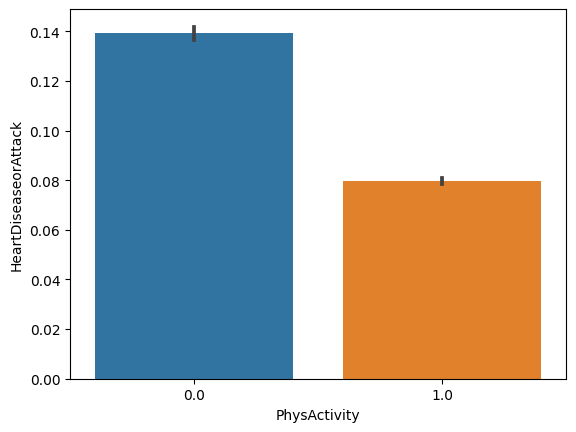

In [51]:
sns.barplot(df, x = "PhysActivity", y = "HeartDiseaseorAttack")

The plot below looks at the correlation between high cholesterol and high blood pressure. It appears that those without high blood pressure (0.0) tend to have high cholesterol less compared to those that have a high blood pressure (1.0)

<Axes: xlabel='HighBP', ylabel='HighChol'>

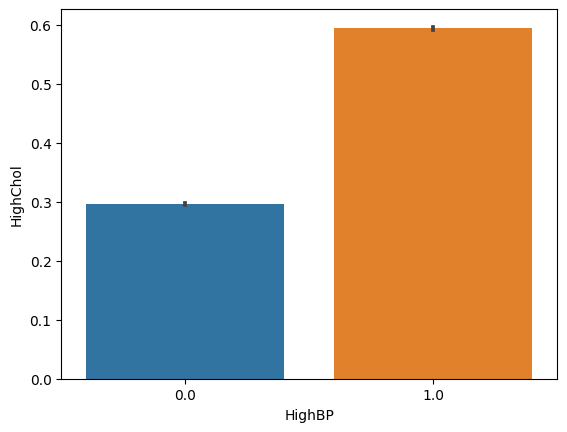

In [52]:
sns.barplot(df, x = "HighBP", y = "HighChol")